# Plot Global Mean Thermosteric Sea Level

In [32]:
import xarray as xr
import numpy as np

In [17]:
data_dir = '../outputs/'

In [18]:
!ls {data_dir}

CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc
CMIP6_SeaLevel_ssp585_zostoga_1986-2100.nc


### Plot zostoga

In [19]:
zostoga_CMIP5  = xr.open_dataset(data_dir+'CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc')

In [20]:
zostoga_CMIP5

<xarray.Dataset>
Dimensions:            (experiment: 2, model: 24, time: 114)
Coordinates:
  * experiment         (experiment) object 'rcp85' 'piControl'
  * model              (model) object 'bcc-csm1-1' ... 'MPI-ESM-MR'
  * time               (time) float64 1.986e+03 1.988e+03 ... 2.098e+03 2.1e+03
Data variables:
    zostoga_detrended  (experiment, model, time) float64 ...
Attributes:
    source_file:    This NetCDF file was built from ComputeGlobalMeanThermalE...
    creation_date:  2020-06-10 15:34

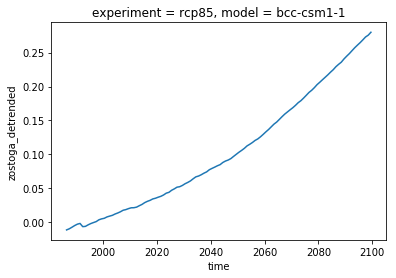

In [30]:
zostoga_CMIP5.zostoga_detrended.sel(experiment='rcp85', model='bcc-csm1-1').plot()

In [29]:
zostoga_CMIP5.zostoga_detrended.sel(experiment='rcp85', model='bcc-csm1-1')

<xarray.DataArray 'zostoga_detrended' (time: 114)>
array([-0.011191, -0.009544, -0.007234, -0.00478 , -0.002739, -0.001673,
       -0.006381, -0.00597 , -0.003715, -0.001826, -0.000343,  0.001062,
        0.003702,  0.005082,  0.005933,  0.00794 ,  0.009159,  0.010284,
        0.012236,  0.013749,  0.01555 ,  0.017799,  0.018715,  0.020199,
        0.021396,  0.021512,  0.022382,  0.024462,  0.026354,  0.028987,
        0.030888,  0.032349,  0.034439,  0.035453,  0.036983,  0.038297,
        0.040257,  0.042942,  0.044174,  0.047197,  0.049283,  0.051761,
        0.052445,  0.054334,  0.056842,  0.058766,  0.061012,  0.06415 ,
        0.066974,  0.068167,  0.070087,  0.072382,  0.074284,  0.077456,
        0.07943 ,  0.081285,  0.083301,  0.084947,  0.088109,  0.090271,
        0.091729,  0.09388 ,  0.09708 ,  0.100166,  0.103237,  0.105966,
        0.108953,  0.112555,  0.114935,  0.117571,  0.120652,  0.122847,
        0.125989,  0.129535,  0.133256,  0.136728,  0.140692,  0.144626,


### Tests

In [34]:
years_s = np.arange(2006,2100)
years_s

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027,
       2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038,
       2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049,
       2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071,
       2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082,
       2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093,
       2094, 2095, 2096, 2097, 2098, 2099])

In [92]:
#Test masking
DIRgrid = '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/'
rg = xr.open_dataset(DIRgrid+'Relative_icesheets.nc', decode_cf=False)

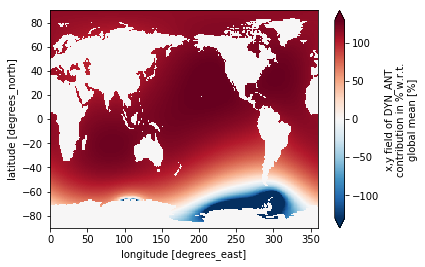

In [97]:
MaskOut     = rg.DYN_ANT
MaskOut.plot(robust=True)

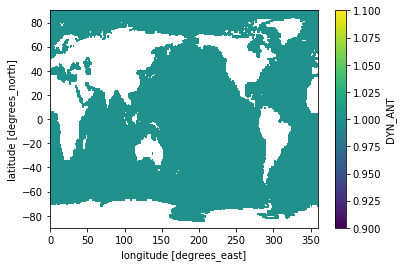

In [84]:
MaskOut = MaskOut.where(MaskOut == 0, 1)
MaskOut = MaskOut.where(MaskOut != 0)
#MaskOut = 1
#MaskOut = MaskOut.where(MaskOut == np.nan, 1)
MaskOut.plot()

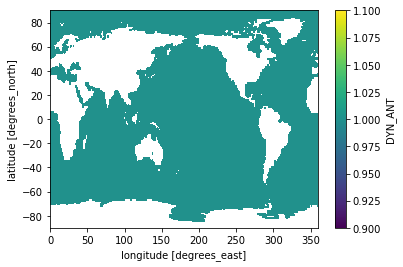

In [86]:
MaskOut.loc[dict(latitude=slice(35,51), longitude=slice(45,56))] = np.nan
MaskOut.plot()

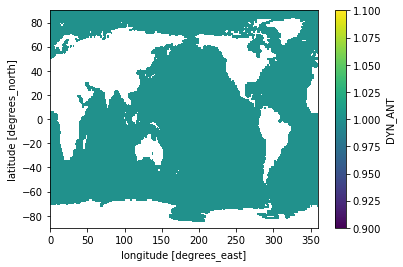

In [87]:
MaskOut_Med = MaskOut
MaskOut_Med.loc[dict(latitude=slice(20.5,41.5), longitude=slice(354,360))] = np.nan
MaskOut_Med.loc[dict(latitude=slice(20.5,41.5), longitude=slice(0,44))] = np.nan
MaskOut_Med.loc[dict(latitude=slice(41,47.5), longitude=slice(2,44))] = np.nan
MaskOut_Med.plot()

In [95]:
rg['DYN_ANT'].encoding

{'source': '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/Relative_icesheets.nc',
 'original_shape': (180, 360),
 'dtype': dtype('float32')}

In [ ]:
MaskOut     = rg.DYN_ANT /100
MaskOut.plot()

In [91]:
rg.DYN_ANT.encoding

{'source': '/Users/dewilebars/Projects/Project_ProbSLR/Data_Proj/Data_AR5/Fingerprints/Relative_icesheets.nc',
 'original_shape': (180, 360),
 'dtype': dtype('float32')}

In [154]:
lon = np.arange(8).reshape(2,4)
lon

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [161]:
lon[:,:].shape

(2, 4)

In [166]:
#Regridding tests with xESMF
import xesmf as xe
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [163]:
ds = xr.tutorial.open_dataset('rasm')
ds


<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 ...
    yc       (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 27 14:15:22 2016: ncatted -a dimension...

In [164]:
dr = ds['Tair']
dr

<xarray.DataArray 'Tair' (time: 36, y: 205, x: 275)>
[2029500 values with dtype=float64]
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 ...
    yc       (y, x) float64 ...
Dimensions without coordinates: y, x
Attributes:
    units:           C
    long_name:       Surface air temperature
    type_preferred:  double
    time_rep:        instantaneous

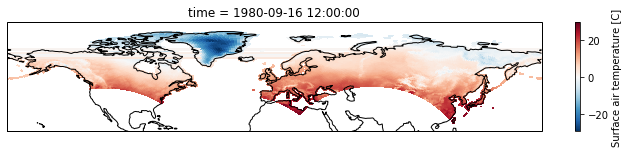

In [176]:
plt.figure(figsize=(12,2));
ax = plt.axes(projection=ccrs.PlateCarree());
dr[0].plot.pcolormesh(ax=ax, x='xc', y='yc');
ax.coastlines();

Text(0, 0.5, 'lat')

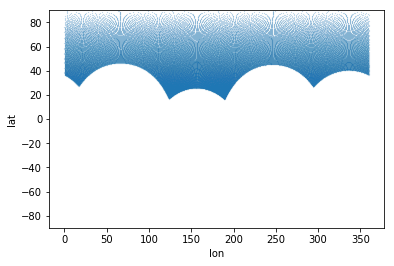

In [177]:
plt.scatter(ds['xc'], ds['yc'], s=0.01)  # plot grid locations
plt.ylim([-90, 90])
plt.xlabel('lon')
plt.ylabel('lat')

In [178]:
ds = ds.rename({'xc': 'lon', 'yc': 'lat'})
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    lon      (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    lat      (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 27 14:15:22 2016: ncatted -a dimension..

In [191]:
#ds_out = xe.util.grid_global(5, 4)
#ds_out  # contains lat/lon values of cell centers and boundaries.

ds_out = xr.Dataset({'lat': (['lat'], np.arange(-90, 90, 1.0)),
                     'lon': (['lon'], np.arange(0, 360, 1.5))})
ds_out

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 240)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
Data variables:
    *empty*

In [192]:
regridder = xe.Regridder(ds, ds_out, 'bilinear')
dr_out = regridder(dr)

Create weight file: bilinear_205x275_180x240.nc


/Users/dewilebars/anaconda3/envs/p37ds/lib/python3.7/site-packages/xarray/core/dataarray.py:219: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  elif isinstance(data, pd.Panel):


In [193]:
dr_out

<xarray.DataArray 'Tair' (time: 36, lat: 180, lon: 240)>
array([[[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[ 0.,  0., ...,  0.,  0.],
        [ 0.,  0., ...,  0.,  0.],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
  * lon      (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 352.5 354.0 355.5 357.0 358.5
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 86.0 87.0 88.0 89.0
Attributes:
    regrid_method:  bilinear

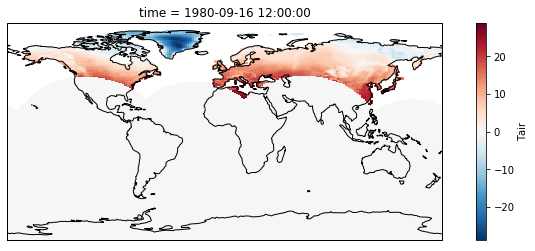

In [194]:
plt.figure(figsize=(12,4));
ax = plt.axes(projection=ccrs.PlateCarree())
dr_out[0].plot.pcolormesh(ax=ax, x='lon', y='lat');
ax.coastlines();

In [195]:
regridder.clean_weight_file()  # clean-up

Remove file bilinear_205x275_180x240.nc


In [190]:
ls

PlotGMTSL.ipynb


In [197]:
xr.__version__

'0.12.1'

In [202]:
a = np.array([[1,2,3,4],[5,6,7,8]])
len(a)

2

In [203]:
a.size

8

In [205]:
a1 = np.array([1,2,3,4])
a2 = np.array([2])
b = a1 - a2
b

array([-1,  0,  1,  2])

In [219]:
data = np.random.rand(4, 3)
locs = ["IA", "IL", "IN"]
times = np.arange(4)
foo = xr.DataArray(data, coords=[times, locs], dims=["time", "space"])
foo = foo.rename({foo.dims[0]:'newtime', foo.dims[1]:'newspace'})
foo

<xarray.DataArray (newtime: 4, newspace: 3)>
array([[0.306193, 0.667576, 0.551973],
       [0.719479, 0.281231, 0.052471],
       [0.643829, 0.453559, 0.319002],
       [0.3988  , 0.085893, 0.976962]])
Coordinates:
  * newtime   (newtime) int64 0 1 2 3
  * newspace  (newspace) <U2 'IA' 'IL' 'IN'

In [226]:
for i in [1,2,3]:
    print('start'+str(i))
    if i==2:
        continue
    print('end')
    

start1
end
start2
start3
end


In [229]:
for i in range(3,5):
    print(i)

3
4
